In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [5]:

df=pd.read_csv("student_data.csv")
df.head()

,Marks 1,Marks 2,Admission
0,75,70,0
1,80,85,1
2,65,60,0
3,90,95,1
4,85,75,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Marks 1    100 non-null    int64
 1   Marks 2    100 non-null    int64
 2   Admission  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [8]:
feature_cols=['Marks 1','Marks 2']
X=df[feature_cols]
y=df.Admission
print(X.head())

   Marks 1  Marks 2
0       75       70
1       80       85
2       65       60
3       90       95
4       85       75


In [9]:
print(y.head())

0    0
1    1
2    0
3    1
4    1
Name: Admission, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape

(75, 2)

In [15]:
X_test.shape

(25, 2)

In [17]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()
m1.fit(X_train,y_train)

LogisticRegression()

In [19]:

y_pred=m1.predict(X_test)
y_test

26    0
86    0
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    0
78    1
13    1
7     1
30    0
22    0
24    1
33    1
8     1
43    1
62    0
3     1
71    1
45    1
Name: Admission, dtype: int64

In [20]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [21]:
y_test

26    0
86    0
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    0
78    1
13    1
7     1
30    0
22    0
24    1
33    1
8     1
43    1
62    0
3     1
71    1
45    1
Name: Admission, dtype: int64

In [26]:

c1=metrics.confusion_matrix(y_test,y_pred)
print(c1)

[[ 8  0]
 [ 0 17]]


In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


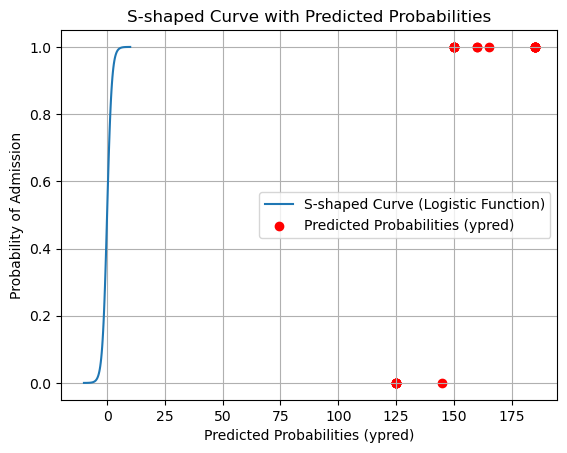

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def logistic(x):
    return 1 / (1 + np.exp(-x))


x_values = np.linspace(-10, 10, 100)

y_values = logistic(x_values)
comb_marks=X_test['Marks 1']+X_test['Marks 2']
plt.plot(x_values, y_values, label='S-shaped Curve (Logistic Function)')
plt.scatter(comb_marks, y_pred, color='red', label='Predicted Probabilities (ypred)')
plt.title('S-shaped Curve with Predicted Probabilities')
plt.xlabel('Predicted Probabilities (ypred)')
plt.ylabel('Probability of Admission')
plt.legend()
plt.grid(True)
plt.show()